In [1]:
import tensorflow as tf

2023-01-16 01:16:49.158053: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
tf.version

<module 'tensorflow._api.v2.version' from '/home/satya/anaconda3/envs/gtsrb1/lib/python3.9/site-packages/tensorflow/_api/v2/version/__init__.py'>

In [3]:
tf.config.list_physical_devices('GPU')


2023-01-16 01:16:49.902184: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2023-01-16 01:16:49.902818: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-16 01:16:49.975142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 01:16:49.975470: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.35GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 245.91GiB/s
2023-01-16 01:16:49.975483: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-01-16 01:16:49.976484: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-01-16 01:16:49.976517: I tensorflow/stream_executor/plat

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2023-01-16 01:16:49.988813: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 01:16:49.989702: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-16 01:16:49.989850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 01:16:49.990200: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.35GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 245.91Gi

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5167712960343260423
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5618085408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4229156986076795815
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


t be at least one NUMA node, so returning NUMA node zero
2023-01-16 01:16:50.398405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 01:16:50.398544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 01:16:50.398650: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/device:GPU:0 with 5357 MB memory) -> physical GPU (device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5)


In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


In [10]:
!pip install opencv-python matplotlib sklearn keras_tuner pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 22.5 MB/s eta 0:00:0031m16.9 MB/s eta 0:00:01


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
import cv2
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

In [12]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2023-01-16 01:20:16.019981: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-16 01:20:16.020248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 01:20:16.020748: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.35GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 245.91GiB/s
2023-01-16 01:20:16.020789: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-01-16 01:20:16.020822: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-01-16 01:20:16.020843: I tensorflow/stream_executor/platform/

In [13]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [14]:
import os
# for dirname, _, filenames in os.walk('../input/gtsrb-german-traffic-sign/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
data_dir = '/home/satya/Gtsrb_clf/gtsrb/'
train_path = '/home/satya/Gtsrb_clf/gtsrb/Train/'
test_path = '/home/satya/Gtsrb_clf/gtsrb/Test/'


In [15]:
folders = os.listdir(train_path)


<BarContainer object of 43 artists>

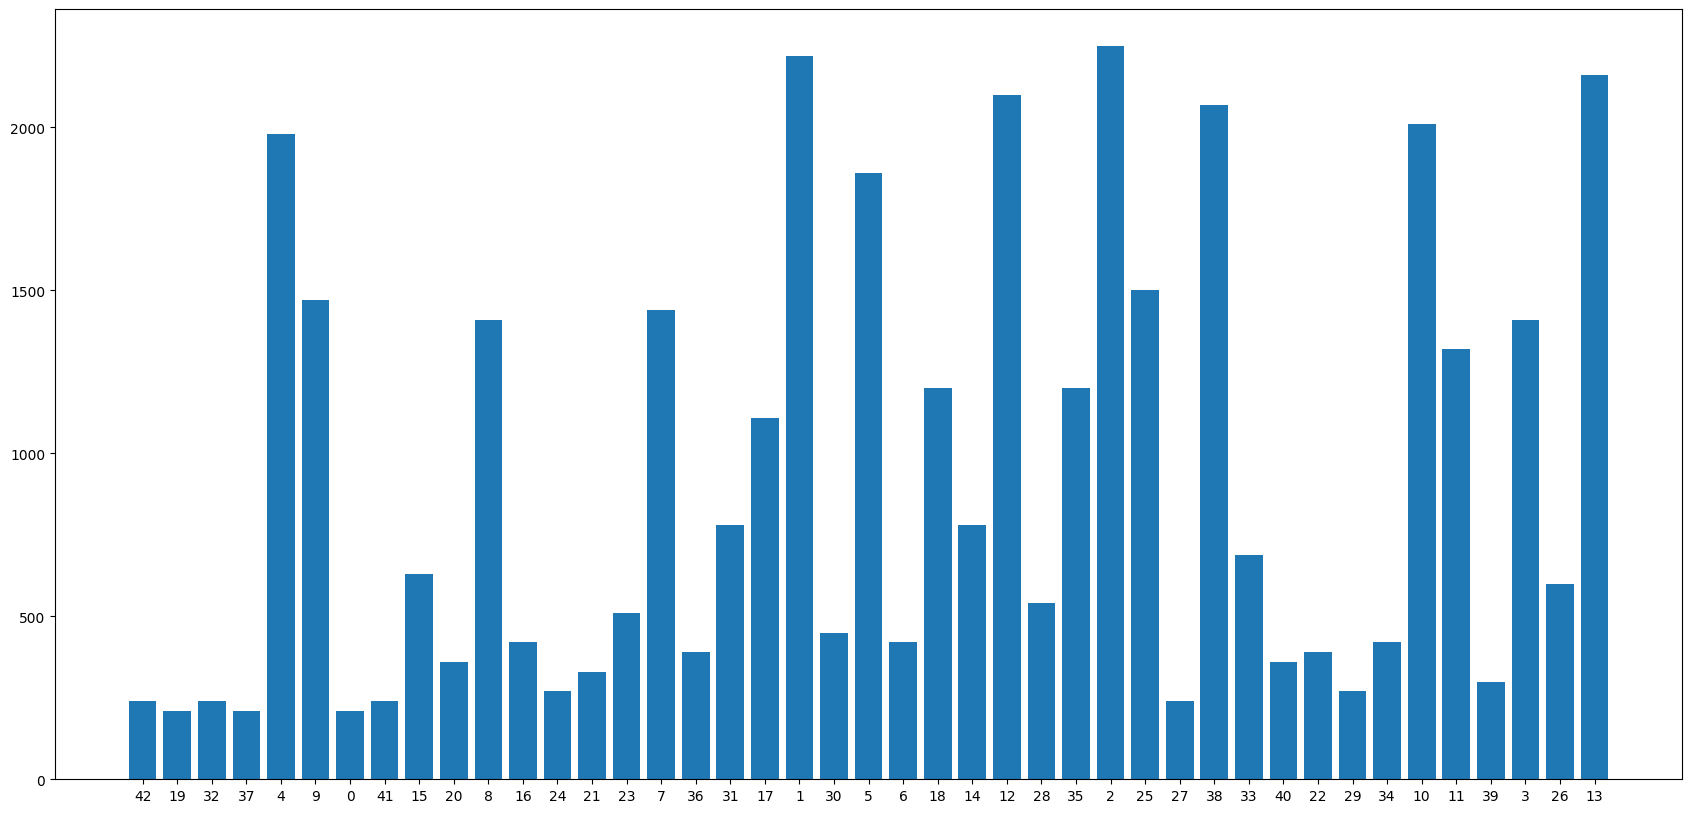

In [16]:
# Visualization for distribution of classes 
samples_dict = {} 

for folder in folders:
    images_in_folder = os.listdir(train_path + '/' + folder)
    samples_dict[folder] = len(images_in_folder)
    
plt.figure(figsize=(21,10))  
plt.bar(*zip(*samples_dict.items()))


In [17]:
image_data = []
image_labels = []
class_num = len(os.listdir(train_path))
for i in range(class_num):
    path = train_path +'/'+ str(i)
    images = os.listdir(path)

    for img in images:
        try:
            #print(path+'/'+img)
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((30, 30))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)
X_train = X_train/255 
X_val = X_val/255

y_train = to_categorical(y_train, class_num)
y_val = to_categorical(y_val, class_num)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner.engine.hyperparameters import HyperParameters
hp = HyperParameters()

class Model(kt.HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential([
        tfl.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=8, max_value=32, step=8), 
            kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), 
            activation='relu',
            padding='same',
            input_shape=(X_train.shape[1:])),
        tfl.MaxPool2D(pool_size=hp.Choice('conv_1_pool', values = [2,4])),
        
        tfl.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16), 
                   kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), 
                   activation='relu',
                   padding='same'),
    #after a Conv2D layer with data_format="channels_first", set axis=1 in BatchNormalization.
    #after a Conv2D layer with data_format="channels_last", set axis=-1 in BatchNormalization.
        tfl.BatchNormalization(axis=-1),
        tfl.Dropout(rate=hp.Float('layer1_drop',min_value=0.0, max_value=0.5)),
        
    
        tfl.Conv2D(filters=hp.Int('conv_3_filter', min_value=64, max_value=128, step=32), 
                   kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), 
                   activation='relu',
                   padding='same'),
        tfl.MaxPool2D(pool_size=hp.Choice('conv_3_pool', values = [2,4])),
        tfl.Conv2D(filters=hp.Int('conv_4_filter', min_value=128, max_value=512, step=64), 
                   kernel_size=hp.Choice('conv_4_kernel', values = [3,5]), 
                   activation='relu',
                   padding='same'),
        tfl.BatchNormalization(axis=-1),
        tfl.Dropout(rate=hp.Float('layer2_drop',min_value=0.0, max_value=0.5)),
    
        tfl.Flatten(),
        tfl.Dense(512,activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(rate=hp.Float('layer2_drop',min_value=0.0, max_value=0.5)),
    
        tfl.Dense(class_num, activation='softmax')
        
        ])
    
        model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        return model
    # The *args and **kwargs are the ones you passed from tuner.search()
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [8, 16]),
            **kwargs,
        )

tuner_random = kt.Hyperband(
    Model(),
    objective="val_accuracy")
# Using early stopping during training via passing in the tf.keras.callbacks.EarlyStopping callback. 
# This can be configured to stop your training as soon as the validation loss stops improving
# # Will stop training if the "val_loss" hasn't improved in 3 epochs.
tuner_random.search(X_train,y_train,epochs=30,validation_data=(X_val,y_val), callbacks=[tf.keras.callbacks.EarlyStopping("val_loss", patience=3)])

In [ ]:
# # Get the best models.
models = tuner_random.get_best_models(num_models=1)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(X_train.shape[1:]))
best_model.summary()

In [12]:
tuner_random.search_space_summary()

NameError: name 'tuner_random' is not defined

In [ ]:
# save model
best_model.save('best_model')
#load 
model = tf.keras.models.load_model('best_model')